# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** [Luthfi Pratama Fauzie]
- **Email:** [luthfifauzie7@gmail.com]
- **ID Dicoding:** [luthfifauzie7]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Are there differences in bicycle use patterns between weekdays and weekends? 
- Pertanyaan 2: Determine if there are seasonal patterns in bicycle use, and if so, how do these patterns differ between seasons?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import streamlit as st

## Data Wrangling

### Gathering Data

In [3]:
data = pd.read_csv('data/hour.csv')

print(data)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

### Assessing Data

1. Information About Data

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


2. Descriptive Statistic

In [5]:
print(data.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

3. Data Variation

In [6]:
data_variation = data.nunique()
print(data_variation)

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64


4. Missing Values

In [7]:
missing_values = data.isnull().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


5. Data Duplicate

In [8]:
dupe = data[data.duplicated()]
print(dupe)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


### Cleaning Data

1. Change The Data Type object to Data Type date time

In [9]:
data['dteday'] = pd.to_datetime(data['dteday'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore day.csv

1. Are there differences in bicycle use patterns between weekdays and weekends? 

In [10]:
data['day_of_week'] = pd.to_datetime(data['dteday']).dt.dayofweek
daily_usage_weekday = data.groupby('day_of_week')['cnt'].mean()
print("\nDifferences in bicycle usage patterns between weekdays and weekends:")
print(daily_usage_weekday)


Differences in bicycle usage patterns between weekdays and weekends:
day_of_week
0    183.744655
1    191.238891
2    191.130505
3    196.436665
4    196.135907
5    190.209793
6    177.468825
Name: cnt, dtype: float64


2. Determine if there are seasonal patterns in bicycle use, and if so, how do these patterns differ between seasons?

In [11]:
monthly_usage = data.groupby(data['dteday'])['cnt'].sum()
print(monthly_usage)

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1:

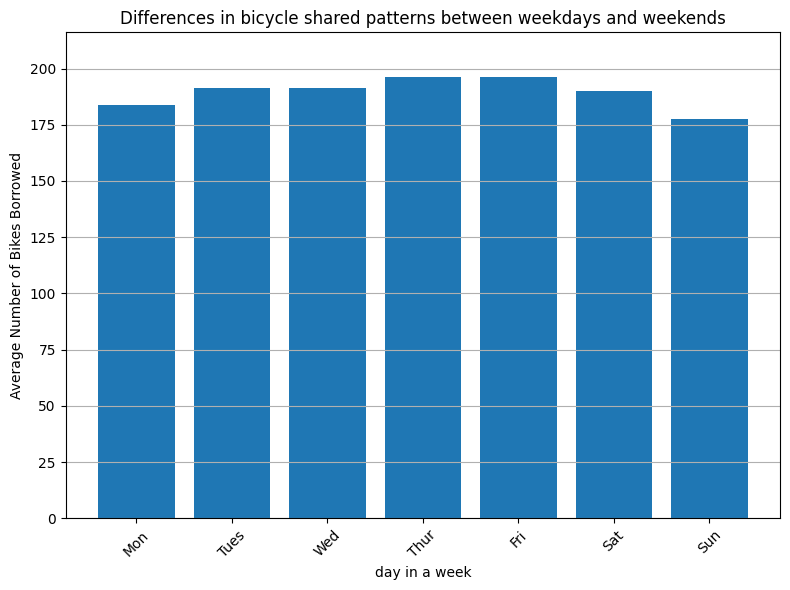

In [12]:
days_of_week = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(8, 6))
plt.bar(days_of_week, daily_usage_weekday)
plt.title('Differences in bicycle shared patterns between weekdays and weekends')
plt.xlabel('day in a week')
plt.ylabel('Average Number of Bikes Borrowed')
plt.ylim(0, max(daily_usage_weekday) * 1.1) 
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.tight_layout()

### Pertanyaan 2:

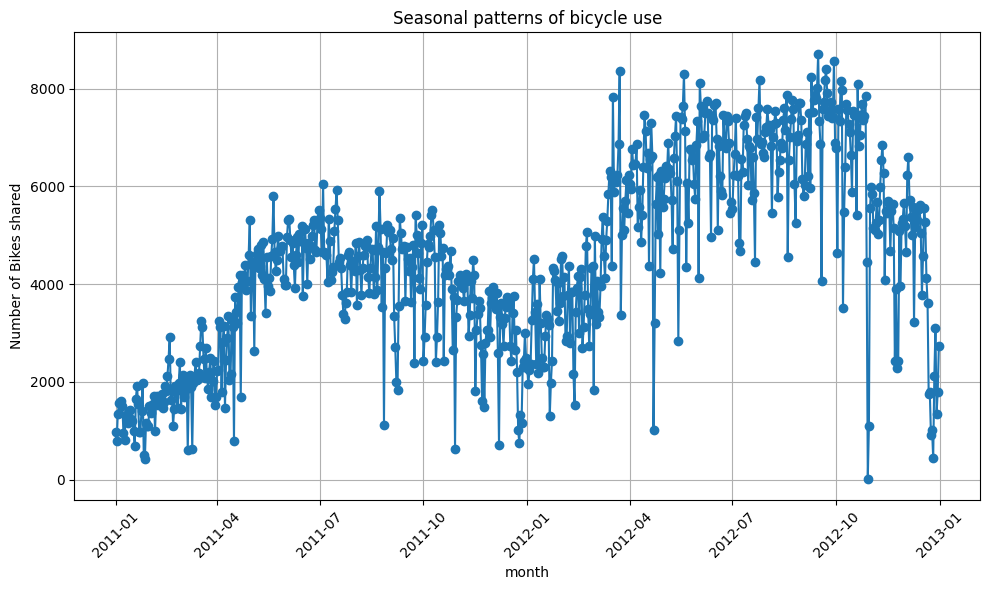

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_usage.index, monthly_usage.values, marker='o', linestyle='-')
plt.title('Seasonal patterns of bicycle use')
plt.xlabel('month')
plt.ylabel('Number of Bikes shared')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1:
The analysis of the line chart reveals a seasonal trend in bicycle sharing over a specific timeframe. We observe fluctuations in the number of bikes borrowed month to month, with noticeable increases during certain months and declines during others. Specifically, the number of bicycles rented rises in the spring and summer, while it drops in the fall and winter. This pattern may be attributed to variations in weather and temperature, which impact people's willingness to use bicycles.

- Conclution pertanyaan 2:
The bar chart illustrates the differences in bicycle sharing habits between weekdays and weekends. It shows that the average number of bicycles borrowed is greater on weekdays than on weekends. This trend is likely due to daily routines, such as work or school, which drive up the demand for transportation, including bicycles, during the week. Conversely, on weekends, when individuals have more free time, the demand for bicycles tends to decline. Nevertheless, some bicycle use persists on weekends, suggesting that they remain a popular transportation option even during leisure time.

In [14]:
data.to_csv('dashboard/main_data.csv',index=False)